<div align="center">
    <img src="image/LogoFacensPos.png" width="300px">
</div>

<h1><center>FACULDADE DE ENGENHARIA DE SOROCABA</center></h1>

<h1><center>PÓS GRADUAÇÃO EM INTELIGÊNCIA ARTIFICIAL APLICADA (MACHINE LEARNING)</center></h1>

<h1><center>Previsão do risco de morte após uma operação cardíaca utilizando o EuroSCORE II</center></h1>

<h2><center>Edson Pires Nunes - RA 191300</center></h2>
<h2><center>Marcelo Fernandes - RA 191303</center></h2>

<div align="right"><h4>Trabalho apresentada ao programa de Pós-Graduação <br>
em Inteligência Artificial Aplicada (Machine Learning),<br>
da Faculdade de Engenharia de Sorocaba, como requisito parcial para <br>
a obtenção do título de Especialista em Inteligência Artificial.</h4></div>

<br><br>

<div align="right"><h4>Orientador:</b> Prof. Msc. Johannes Von Lochter</h4></div>

<br><br>

<h2><center>SOROCABA/SP</center></h2>
<h2><center>2020</center></h2>

<br><br>

## Introdução

<br><br>O termo EuroSCORE significa “Sistema Europeu de Risco em Operações Cardíacas”, é um modelo que permite o cálculo do risco de morte após uma operação cardíaca.

O modelo solicita alguns itens de informação sobre o paciente, o estado do coração e a operação proposta, e utiliza regressão para calcular o risco de morte.

Publicado pela primeira vez em 1999, o modelo foi adotado mundialmente, tornando-se o índice de risco mais amplamente utilizado para cirurgia cardíaca, e acredita-se que seu uso tenha contribuído substancialmente para a melhora nos resultados da cirurgia cardíaca observada no início do milênio.

Os modelos originais estão envelhecendo e um novo modelo intitulado EuroSCORE II foi anunciado e publicado no European Journal of Cardiothoracic Surgery em abril de 2012.

Os primeiros relatórios sobre o uso do EuroSCORE II são encorajadores, com evidências mostrando que ele melhorou substancialmente a calibração dos modelos mais antigos e, pelo menos, manteve e talvez melhorou ainda mais o poder discriminatório dos modelos anteriores.

Os modelos de risco são usados por duas razões principais. A primeira é que um modelo de risco como o EuroSCORE permite o cálculo do risco de morte antes de uma operação cardíaca. Isso é importante porque serve para orientar o clínico e o paciente sobre a conveniência de uma operação, ajudando a pesar o risco e os benefícios. A segunda é como método de controle de qualidade. Ao calcular o risco de morte esperado para uma população de pacientes submetidos a operações cardíacas, isso pode ser comparado com o número de mortes reais. Essa comparação pode ser usada como uma medida da qualidade do desempenho do hospital, unidade ou cirurgião em questão.

Pensando em utilizar a tecnologia para o bem das pessoas, resolvemos nos aprofundar neste assunto e leva-lo como tema do nosso trabalho de conclusão de curso, com o intuito de prever o risco de morte após uma operação cardíaca e comparar o resultado com o EuroSCORE II.

<br><br>

## Trabalhos relacionados / Exemplos de literatura

<br><br>
Estudos foram realizados utilizando aprendizado de máquina, na tentativa de prever o risco de morte em pacientes após uma cirurgia cardíaca.

Destacamos aqui o artigo intitulado “Uma comparação de um modelo de aprendizado de máquina com o EuroSCORE II na previsão de mortalidade após cirurgia cardíaca eletiva” &#91;4&#93;.

O estudo utilizou um banco de dados coletado de dezembro de 2005 a dezembro de 2012, em um centro cirúrgico cardíaco de um Hospital Universitário. Os diferentes modelos de predição de mortalidade intra-hospitalar após cirurgia cardíaca, incluindo EuroSCORE II, um modelo de regressão logística e um modelo de aprendizado de máquina, foram comparados por ROC (Receiver Operating Characteristic - Análise de característica de operação do receptor) e DCA (Decision Curve Analysis - Análise da curva de decisão). 

Dos 6.520 pacientes submetidos à cirurgia cardíaca eletiva com circulação extracorpórea, 6,3% morreram. A média de idade foi de 63,4 anos (desvio padrão 14,4) e a média do EuroSCORE II foi de 3,7 (4,8)%. A área sob a curva ROC (IC95%) para o modelo de aprendizado de máquina (0,795 (0,755–0,834)) foi significativamente maior do que o EuroSCORE II ou o modelo de regressão logística (respectivamente, 0,737 (0,691–0,783) e 0,742 (0,698–0,785)). A Análise da Curva de Decisão mostrou que o modelo de aprendizado de máquina, neste estudo, tem um benefício maior qualquer que seja o limite de probabilidade.

O estudo concluiu que, de acordo com ROC e DCA, o modelo de aprendizado de máquina é mais preciso na previsão de mortalidade após cirurgia cardíaca eletiva do que o EuroSCORE II. Esses resultados confirmam o uso de métodos de aprendizado de máquina no campo da previsão médica.

<br><br>

## Metodologia

<br><br>
A partir deste ponto iniciamos a análise dos dados e o desenvolvimento do modelo proposto.

<br><br>

## Importação das bibliotecas

<br><br>O <b>Pandas Profiling</b> é uma ferramenta que gera um relatório html com informações estatísticas e as principais características do seu dataframe.

<p>O <b>PyCaret</b> é uma biblioteca de aprendizado de máquina de código aberto que permite ir desde a preparação de seus dados até a implantação de seu modelo.
<p>A ideia do PyCaret é simplificar o trabalho e automatizar tarefas de rotina, aumentando a produtividade e permitindo entregar soluções mais rapidamente.

In [1]:
import pandas as pd
import numpy as np
import os.path
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas_profiling
from pycaret.regression import *
from pycaret.utils import check_metric
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<br><br>

## Definição das funções

In [2]:
# Função para normalizar texto
def normalize_text(txt):
    return txt.lstrip().rstrip().lower().replace(" ", "_").replace("/", "_or_").replace("%", "_percent_").replace(".", "_dot_").replace("<>", "_different_").replace("-", "_less_").replace("+", "_plus_").replace(">", "_larger_than_").replace("<", "_less_than_")

# Função para tratamento dos nomes das colunas
def clean_dataframe_column_names(df):
    return [normalize_text(col) for col in df.columns]

# Função para salvar o arquivo com a análise exploratória dos dados (EDA - Exploratory Data Analysis)
def save_eda(fileName, df):
    if not os.path.isfile(fileName):
        pfr = pandas_profiling.ProfileReport(df)
        pfr.to_file(fileName)
    else:
        print (f"EDA already saved, please check {fileName}.")

<br><br>

## Base de dados

<br><br>
A base de dados escolhida contém informações coletadas no período de janeiro de 2006 a dezembro de 2012 com 7161 registros.

A mesma passou por revisão em 24/04/2020.

<br><br>

## Importação da base de dados

In [3]:
# Raw Data: "Dados crus"
raw_data = pd.read_excel("data/raw/Euroscore.xls")

# Salvando o arquivo com a análise exploratória dos dados "crus"
save_eda("EDA_Raw.html", raw_data)

EDA already saved, please check EDA_Raw.html.


<br><br>

## Dicionário de dados

<br><br>GENDERPAT_A: Gênero do paciente
<br>AGEPAT: Idade
<br>SMOKER: Fumante
<br>ARTERIAL HYPERTENSION: Hipertensão arterial
<br>DIABETES STATUS: Diabetes
<br>DYSLIPIDEMIA: Dislipidemia (colesterol alto)
<br>CORONARYARTERYDISEASE: Doença artério coronariana
<br>- No (sem alteração)
<br>- Non STEMI (sem Supra do segmento ST: sem alteração no eletro)
<br>- STEMI (com Supra do segmento ST: alteração no eletro)
<br>- Stable angina: Angina estável (dor que não passa))
<br>ACS<>: Tempo do infarto
<br>PREVIOUSANGIOPLASTY: Angioplastia previa
<br>PREVIOUS CARDIAC SURGERY: Cirurgia cardíaca previa
<br>NUMBER: Quantidade (podem ser vários procedimentos em um só)
<br>EXTRACARDIAC ARTERIOPATHY: Arteriopatia Extra cardíaca (doença da artéria)
<br>PREVIOUS CARDIAC FAILURE:  Parada cardíaca previa
<br>PREVIOUS ENDOCARDITIS: Endocardite previa (infecção do musculo cardiado)
<br>PREVIOUSEMBOLICEVENT: Trombo-embolismo (embolia pulmonar/ trombose)
<br>PREVIOUS STROKE: Derrame prévio (Hemorragico, Isquemico, Transitório)
<br>NEUROLOGIC DYSFUNCTION: Disfunção neurológica
<br>COPD: (DPOC em português) Doença pulmonar obstrutiva crônica (tratada, sem tratamento, não)
<br>COPDEUROSC_A: (DPOC em português) Doença pulmonar obstrutiva crônica (1 para tratada, 0 para o resto)
<br>ULCER: Ulcera
<br>NEOPLASIA: Câncer (período)
<br>PREVIOUSRADIOTHERAPY: Radioterapia Previa
<br>CIRRHOSIS: Cirrose
<br>ON DIALYSIS: Em dialise
<br>WEIGHT: Peso
<br>HEIGHT: Altura
<br>BMI: IMC - Índice Massa Corporal
<br>CARDIAC RHYTHM: Ritmo cardíaca
<br>- Sinusal (normal)
<br>- FA ou TSV (arritmias graves)
<br>NYHACLASS: Classificação de insuficiência cardíaca (1 a 4)
<br>ANGORCLASSECCS: Classificação de Angina (dor) (de 0 a 4)
<br>CARDIACFAILURE: Insuficiência cardíaca
<br>ACTIVEENDOCARDITIS: Endocardite ativa (Se está ou não com infecção)
<br>ACTIVEENDOCARDITIS_B: Endocardite ativa (Se está ou não com infecção)
<br>CRITICALPREOPERATIVESTATE_A: Estado crítico no pré-operatório
<br>CREATININE:  CREATININA
<br>CLEARANCECOCK:  Clearence de creatinina (avalia a função renal)
<br>CLEARANCE:  Clearence de creatinina (avalia a função renal)
<br>LVEF: Fração de injeção do ventrículo esquerdo (valor)
<br>PAPSYST: Pressão de artéria pulmonar
<br>CORONARYARTERYDISEASE: Doença artério coronariana (sim ou não)
<br>VALVULOPATHY: Valvulopatia - Doença valvar
<br>SINGLEVALVULOPATHY: Se é em uma só (tipo)
<br>POLYVALVULOPATHY: Em múltiplas
<br>TRICUSPID: Na válvula tricúspide
<br>ETIOLOGY: Etiologia (causa da doença valvar)
<br>REDO_A - Motivo da re-operação
<br>ASCENDINGAORTA: Aneurisma de aorta ascendente (Não, Aneurisma, Aneurisma Dissecante (grave))
<br>CONGENITALHEARTDISEASE: Se possui Doença cardíaca congênita
<br>OTHERS: Outras condições
<br>URGENCY: Urgência
<br>URGENCY_A: Urgência
<br>VALVULARSURGERY: Cirurgia valvular
<br>AORTIC: Tipo de válvula a ser colocada
<br>MITRAL: Tipo de válvula a ser colocada
<br>TRISCUPID: Tipo de válvula a ser colocada
<br>CABG: (Coronary Artery Bypass Grafting) Se possui revascularização (ponte)
<br>ASCENDINGAORTASURGERY: Cirurgia na aorta ascendente (Tipo)
<br>OTHERS: Motivo da Cirurgia da aorta 
<br>WEIGHTOFPROC: Quantidade de procedimentos na Cirurgia
<br>INTRAHOSPITALDEATH: Morte intra-hospitalar
<br>D30DEATH: Morte em 30 dias
<br>redo: Re-operação (sim ou não)
<br>RENALIMPAIRMENT: Insuficiência renal
<br>ua: Aguda
<br>PULMONARYHYPERTENSION: hipertensão de artéria pulmonar
<br>lv1: Nível da hipertensão de artéria pulmonar
<br>lv2: Nível da hipertensão de artéria pulmonar
<br>SURGERYTHORACICAORTA: Cirurgia aorto torácica
<br>PROCEDURE: Se fez o procedimento de Cirurgia aorto torácica
<br>DIABETESONINSULIN: Dependente de insulina
<br>RECENTMI_A: Infarto do miocárdio recente
<br>LVEFISOTOPIC: Fração de injeção isotópica
<br>mi: Se a operação é por Infarto do miocárdio
<br>SURG: Se o paciente já passou por algum procedimento (sim ou não)

<br><br>

## Análise exploratória dos dados

<br><br>A análise exploratória de dados nos permite extrair informações relevantes sobre o conjunto de dados que estamos trabalhando e o pandas profiling é uma ótima ferramenta para agilizar essa tarefa.  
<p>Em poucos minutos conseguimos gerar informações detalhadas sobre os dados aumentando a nossa produtividade no dia a dia.

Algumas das principais informações que o pandas profiling nos fornece:
- Qual o tamanho do dataset
- Quantidade de linhas duplicadas
- Quantidade de linhas do dataframe
- Quantidade de linhas por colunas
- O tipo de dado de cada coluna
- Quantidade de valores ausentes
- Qual a distribuição das colunas numéricas

<br>

<div>
    <img src="image/01 - Overview.jpg">
</div>

Informações sobre cada uma das colunas da nossa base:
- Valores distintos
- Valores ausentes
- valores zerados
- Valores médio / mínimo / máximo

<br>

<div>
    <img src="image/02 - Variables.jpg">
</div>

Exibe também as informações das colunas da base e quais delas possuem valores ausentes:

<br>

<div>
    <img src="image/03 - Missing values.jpg">
</div>

Além de uma amostra dos dados:

<br>

<div>
    <img src="image/04 - Sample.jpg">
</div>

<br><br>

## Pré-processamento

<br><br>Com a análise exploratória dos dados, identificamos valores nulos na base e realizamos o preenchimento com a média das colunas.
<p>Identificamos também um registro duplicado e realizamos a sua remoção.
<p>Alteramos as variáveis binárias de Yes/No para 1/0.
<p>Fizemos algumas melhorias na nomenclatura das colunas para uma melhor clareza e um melhor entendimento.
<p>Após ajustes, geramos um novo arquivo html com os dados pré-processados utilizando o pandas profiling.

In [4]:
# Preenchendo os valores NaN com a média
pre_data = raw_data.fillna(raw_data.mean())

# Preenchendo os valores string com "No" (Valor mais provável)
pre_data = pre_data.fillna("no")

# Remover duplicadas (1 observação)
pre_data.drop_duplicates(inplace=True)

# Variáveis binárias de Yes/No para True/False
for cl in pre_data.select_dtypes(include=["object"]):
    pre_data[cl] = pre_data[cl].apply(lambda _: str(_).lower())
    if pre_data.groupby(cl)[cl].nunique().count() == 2:
        pre_data[cl] = pre_data[cl].map(dict(yes=True, no=False)).fillna(pre_data[cl])

#Convertendo 1/0 para True/False
bool_cols = [col for col in pre_data 
             if np.isin(pre_data[col].dropna().unique(), [0, 1]).all()]

for i in bool_cols:
    if pre_data[i].dtypes == "int64":
        pre_data[i] = pre_data[i].replace(1,True) 
        pre_data[i] = pre_data[i].replace(0,False) 

# Normalização das strings
pre_data = pre_data.applymap(lambda s:normalize_text(s) if type(s) == str else s)

# Limpeza do nome das colunas
pre_data.columns = clean_dataframe_column_names(pre_data)

# Backup em CSV
pre_data.to_csv("data\processed\pre_processed.csv", index=False)

In [5]:
# Liberar memória para a variável não usada
del raw_data
del pre_data
# Carregar o CSV previamente salvo
pre_processed_data = pd.read_csv("data\processed\pre_processed.csv")

In [6]:
# Salvando o arquivo com a análise exploratória dos dados pré-processados
save_eda("EDA_Pre_Processed.html", pre_processed_data)

EDA already saved, please check EDA_Pre_Processed.html.


<br><br>

## Processamento

<br><br>Em uma nova análise, após o pré-processamento dos dados, identificamos e desconsideramos algumas colunas que não interessam para o resultado final do nosso modelo e também algumas colunas correlacionadas. 

<br>Colunas que não serão usadas no modelo:
- es1: Vamos usar o ES2.
- d30death / intrahospitaldeath: Estas colunas informam se o paciente faleceu nos 30 dias após a cirurgia (d30death) ou se o paciente teve morte intra-hospitalar, ou seja, informam se o paciente morreu ou não. Sendo assim, estamos desconsiderando estas duas colunas na predição do modelo, pois a nossa ideia é entrarmos com os dados do paciente antes da cirurgia, tentando prever o risco de morte.

<br>Colunas com alta correlação:
- aa2: Correlacionada com aa, sendo que a aa varia um pouco mais.
- clearancecock: Correlacionada com clearance, sendo que a clearancecock é arredondada para XX casas decimais.
- procedure: Correlacionada com surg, cujo indica quantos procedimentos o paciente já passou.
- neurologic_dysfunction_a: Mesma informação da neurologic_dysfunction.
- activeendocarditis_b: Mesma informação da activeendocarditis.
- urgency_a: Mesma informação da urgency.
- valvularsurgery: Mesma informação da valvulopathy.

<br>

<div>
    <img src="image/05 - Warnings.jpg">
</div>


<br><br>Sendo assim, efetuamos a remoção destas colunas e geramos um novo arquivo com a base processada.

In [7]:
# Remoção das colunas
colsToDrop = ["es1", "d30death", "intrahospitaldeath", "aa2", "clearancecock", "procedure", "neurologic_dysfunction_a", "activeendocarditis_b", "urgency_a", "valvularsurgery"]
pre_processed_data = pre_processed_data.drop(colsToDrop, axis=1)

# Salvar dados processados em CSV
pre_processed_data.to_csv("data\processed\processed.csv", index=False)

# Liberar memória
del pre_processed_data

# Carregar CSV previamente salvo
processed_data = pd.read_csv("data\processed\processed.csv")

<br><br>

## Divisão da base para treinamento, teste e validação.

<br><br>Separação em treinamento e validação (Posteriormente a parte de treino será dividida em treino e teste automaticamente pela função setup do PyCaret)

In [8]:
data_train, data_validation = train_test_split(processed_data, test_size=0.3, random_state=42)

<br><br>

## Regressão

<br><br>Utilizamos o modelo de regressão, pois executamos uma tarefa de previsão de uma variável de destino contínua com base em variáveis ​​independentes.

<br><br>

## Setup do modelo de regressão

<br><br>A função de setup realiza inferências sobre os dados e executa várias tarefas como ignorar colunas de ID e Data, codificação categórica, valores ausentes com base no tipo de dados inferido pelo algoritmo interno da PyCaret.

<p>O setup também separa a base em treino e teste. Neste caso, fizemos a configuração para dividir a base data_train em treino e teste na proporção de 70/30.

<p>Os parâmetros feature_selection e feature_selection_threshold são utilizados para determinar os recursos que são mais importantes na previsão da variável de destino.

<p>Quando o feature_selection é definido como True, um subconjunto de recursos é selecionado usando uma combinação de várias técnicas de importância de permutação, incluindo Random Forest, Adaboost e correlação linear com a variável de destino.

<p>O parâmetro remove_multicollinearity está relacionado com a multicolinearidade, cujo existe quando um recurso está altamente correlacionado com outro recurso, o que pode levar a modelos instáveis. Portanto, isso pode ser removido usando o parâmetro remove_multicollinearity.

<p>Quando definido como True, as variáveis com inter-correlações mais altas do que o limite definido no parâmetro multicollinearity_threshold são descartadas. Quando dois recursos estão altamente correlacionados entre si, o recurso que está menos correlacionado com a variável de destino é descartado.

<p>Com o parâmetro silent, definido como True, a confirmação dos tipos de dados não é necessária. Todo o pré-processamento será executado assumindo tipos de dados inferidos automaticamente.

<p>Após execução do setup, é retornada uma lista de todos os recursos e seus tipos de dados inferidos, conforme tabela abaixo.

In [9]:
pre_setup_data = setup(data_train,
    train_size=0.7,
    target="es2",
    feature_selection=True,
    feature_selection_threshold=0.8,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
    silent=True)

,Description,Value
0,session_id,6095
1,Target,es2
2,Original Data,"(5012, 71)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,59
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3508, 145)"


In [10]:
# Salvar dataset transformado em CSV
get_config('X').to_csv("data\processed\setup.csv", index=False)

In [12]:
# Carregar o CSV previamente salvo
setup_data = pd.read_csv("data\processed\setup.csv")

# Salvando o arquivo com a análise exploratória dos dados após o setup
save_eda("EDA_Setup.html", setup_data)

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]


<br><br>

## Treinamento e comparação dos modelos de regressão

<br><br>A função compare_models() treina todos os modelos na biblioteca de modelos usando hiperparâmetros padrões e avalia as métricas de desempenho usando validação cruzada.  

Ela retorna os objetos de modelo treinados e as métricas de avaliação utilizadas.  
- MAE: Mean Absolute Error (Erro absoluto médio)
- MSE: Mean Squared Error (Erro quadrático médio)
- RMSE: Root Mean Squared Error (Raiz quadrada média do erro)
- R2: R-Squared (R ao quadradoo ou coeficiente de determinação)
- RMSLE: Root Mean Squared Logarithmic Error (Raiz do erro médio quadrático e logarítmico)
- MAPE: Mean Absolute Percentage Error (Porcentagem média do erro absoluto)
- TT (Sec): Training Time (Tempo de treino em segundos)

In [13]:
compare_models(sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.8384,7.0315,2.5800,0.9137,0.1370,0.1456,16.0680
xgboost,Extreme Gradient Boosting,1.0838,10.7984,3.2174,0.8651,0.1715,0.1719,1.8700
lightgbm,Light Gradient Boosting Machine,1.0670,8.8822,2.9218,0.8909,0.1885,0.1822,0.2030
et,Extra Trees Regressor,1.4142,17.0235,4.0573,0.7862,0.2273,0.2119,3.5870
rf,Random Forest Regressor,1.3155,12.2973,3.4379,0.8476,0.2204,0.2128,3.4520
dt,Decision Tree Regressor,1.8902,24.5828,4.9112,0.6846,0.3191,0.2858,0.1570
gbr,Gradient Boosting Regressor,1.2714,8.7481,2.9256,0.8900,0.2533,0.3380,0.7700
huber,Huber Regressor,2.8926,65.4451,8.0354,0.1865,0.5141,0.6114,1.0260
omp,Orthogonal Matching Pursuit,2.3383,17.0953,4.1071,0.7841,0.4198,0.9397,0.0340
br,Bayesian Ridge,2.2690,15.8195,3.9565,0.8001,0.4129,0.9886,0.0810


<br><br>

## Criação do modelo usando o de melhor desempenho

<br><br>Utilizamos a função create_model() para fazer uma validação cruzada em k-vezes (default = 10) junto com o objeto de modelo treinado, onde é retornada uma tabela com as métricas de desempenho.

In [14]:
trained_model = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8531,11.4282,3.3806,0.8694,0.1290,0.1370
1,0.7224,4.7492,2.1793,0.9251,0.1360,0.1484
2,0.7593,5.0724,2.2522,0.9296,0.1277,0.1360
3,0.6055,1.9413,1.3933,0.9758,0.1201,0.1344
4,0.6584,3.6482,1.9100,0.9325,0.1314,0.1504
5,0.9301,7.7806,2.7894,0.9143,0.1484,0.1621
6,0.8380,9.2567,3.0425,0.8729,0.1291,0.1398
7,0.9461,6.4493,2.5396,0.9125,0.1597,0.1554
8,1.0696,11.0752,3.3279,0.9020,0.1413,0.1444
9,1.0017,8.9139,2.9856,0.9027,0.1474,0.1480


In [15]:
# Salvando o modelo em um arquivo físico, assim podemos acessar o mesmo sem a necessidade de criá-lo novamente.
save_model(trained_model, "trained_model")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='es2',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                                                     subclass='binary',
                                                     target='es2',
                                                     top_features_to_pick=0.19999999999999996)),
                 ('fix_multi',
                  Fix_multicollinearity(correl

<br><br>

## Ajuste dos hiperparâmetros

<br><br>Utilizamos a função tune_model() com o intuito de ajustar automaticamente os hiperparâmetros do modelo passado,  fazendo também uma validação cruzada em k-vezes (default = 10).

<p>Esta função utiliza o Grid Search, técnica de ajuste que tenta calcular os valores ideais de hiperparâmetros.

<p>A função retorna as métricas de avaliação da aprendizagem supervisionada.

In [16]:
tuned_model = tune_model(trained_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3077,15.2062,3.8995,0.8262,0.2194,0.2658
1,1.0951,6.7573,2.5995,0.8934,0.2162,0.2630
2,1.2362,8.5116,2.9175,0.8819,0.2190,0.2759
3,0.9926,3.7402,1.9340,0.9534,0.1994,0.2533
4,1.0716,7.9526,2.8200,0.8530,0.2065,0.2632
5,1.3265,13.2262,3.6368,0.8543,0.2135,0.2515
6,1.1801,12.0832,3.4761,0.8341,0.1990,0.2381
7,1.3488,8.8191,2.9697,0.8804,0.2308,0.2667
8,1.4776,12.6006,3.5497,0.8885,0.2280,0.2683
9,1.3903,14.1721,3.7646,0.8453,0.2153,0.2291


In [17]:
# Salvando o modelo ajustado em um arquivo físico, assim podemos acessar o mesmo sem a necessidade de criá-lo novamente.
save_model(tuned_model, "tuned_model")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='es2',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                                                     subclass='binary',
                                                     target='es2',
                                                     top_features_to_pick=0.19999999999999996)),
                 ('fix_multi',
                  Fix_multicollinearity(correl

<br><br>

## Escolha do modelo

<br><br>Analisando os resultados gerados pelo setup inicial e também pelo tunning, escolhemos seguir com o modelo montado pelo setup inicial para fazer as predições, pois o tunning dos hiperparâmetros baixou o R2 e aumentou o percentual do erro.

<br><br>
## Plotagem do impacto das features no modelo
<br><br>

## Interpretação do modelo com SHAP

<br>SHAP (SHapley Additive ExPlanations) é uma maneira de explicar os resultados de um modelo de aprendizado de máquina.

<p>Podemos usá-lo para ver quais recursos são mais importantes traçando os valores de SHAP de cada recurso para cada amostra.

<p>A cor representa o valor do recurso, vermelho sendo alto e azul sendo baixo.

<br>Exemplos:
- criticalpreoperativestate_a_0: Os valores em azul significa valores baixos na coluna, e os valores em vermelho alto. Neste caso, os valores baixos, ou seja, "Estado pré-operatório crítico = Não" contribuíram com maior impacto no resultado do modelo (lado direito do gráfico).

- agepat: Quanto maior a idade (vermelho), maior o risco de morte (direita da linha vertical). Quando menor (azul), menos risco (esquerda da linha vertical).

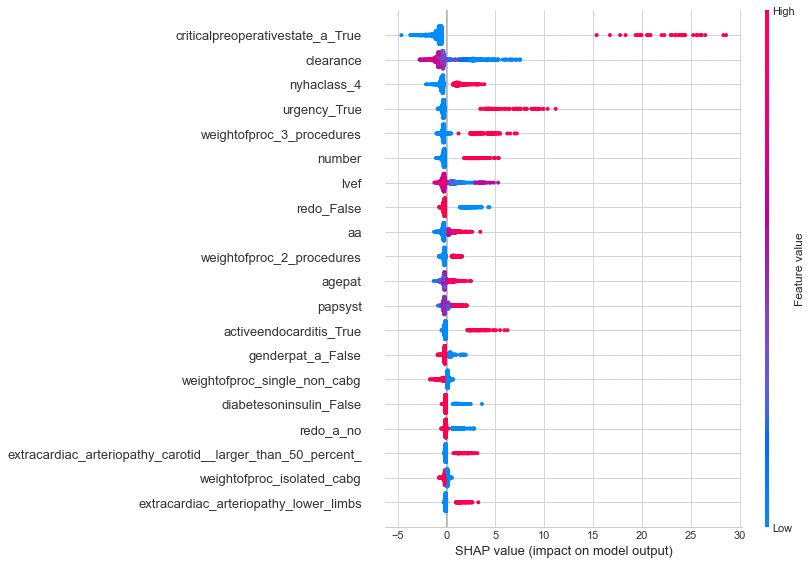

In [18]:
interpret_model(trained_model)

<br><br>

## Peso das features

<br><br>O gráfico gerado nos mostra os recursos que contribuíram para a nossa previsão.
<p>As caracteríscias que empurram a previsão para cima são mostradas em vermelho e as que empurram a previsão para baixo estão em azul.

In [19]:
interpret_model(trained_model, plot = 'reason', observation = 10)

<br><br>

## Predição na base de validação

In [20]:
# Carregando o modelo treinado salvo previamente
trained_model = load_model("trained_model")

Transformation Pipeline and Model Successfully Loaded


In [21]:
# Executando a predição na base de validação
unseen_predictions_trained = predict_model(trained_model, data=data_validation)

In [22]:
# Salvando o dataset transformado em CSV
unseen_predictions_trained.to_csv("data\processed\predictions_trained.csv", index=False)

In [23]:
# Carregando o CSV previamente salvo
unseen_predictions_trained = pd.read_csv("data\processed\predictions_trained.csv")

<br><br>

## Carregando dados de validação

In [24]:
predictions = unseen_predictions_trained
es2 = predictions.es2
es2_predicted = predictions.Label

<br><br>

## Avaliação do modelo nos dados de validação

In [25]:
mae = metrics.mean_absolute_error(es2, es2_predicted)
mse = metrics.mean_squared_error(es2, es2_predicted)
r2 = metrics.r2_score(es2, es2_predicted)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 score: {r2}')

MAE: 0.8208991105624082
MSE: 6.13864741437617
R2 score: 0.9294619423573757


<br><br>

## Comparativo Real (ES2) x Previsto

<br><br>Para validar a eficácia do nosso modelo, geramos um gráfico comparativo entre os valores reais do ES2 e os valores previstos.

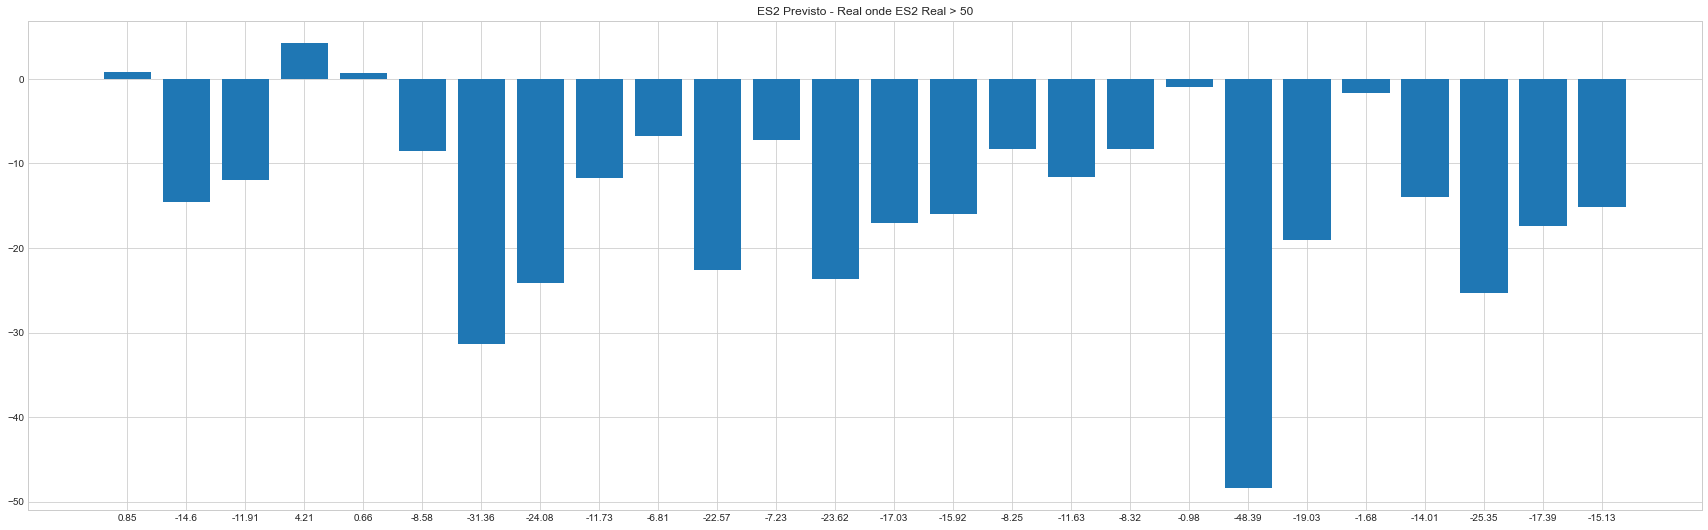

,Label,es2
180,61.090494,60.243351
245,44.916656,59.515705
338,73.873323,85.785111
440,57.988076,53.777081
753,53.404661,52.739686
830,67.857372,76.435941
934,24.456946,55.819726
935,40.685371,64.764495
1062,44.112611,55.846555
1108,55.697022,62.510553


In [62]:
es2_ref = 50
high_es2 = predictions.loc[es2 >= es2_ref][["Label", "es2"]]
diff = round(high_es2.Label - high_es2.es2, 2)
index = np.arange(len(diff))
plt.figure(figsize=(30, 9))
plt.bar(index, diff)
plt.xticks(index, diff)
plt.title(f"ES2 Previsto menos Real onde ES2 Real > {es2_ref}")
plt.show()

display(high_es2)

## Conclusões
De acordo com os resultados apresentados, concluímos que o nosso modelo de aprendizado de máquina teve uma boa precisão na previsão do risco de morte após uma operação cardíaca se comparado ao modelo do EuroSCORE II.  
Porém onde o risco é maior (EuroSCORE maior que 50) notamos que o modelo erra para baixo, em alguns casos em quase 50 pontos.  
Apesar do R2 de 0,92 percebemos que o modelo deve ser ajustado para melhorarmos os índices onde ele é mais crítico.   
Entendemos que pelo balanceamento da base (apenas 26 amostras com EuroSCORE maior que 50) prejudicou o modelo nesses casos.  
Porém esses resultados mostram que o uso de métodos de aprendizado de máquina no campo da previsão médica pode ser promissor.

<br><br>

## Trabalhos futuros

<br><br>Visando dar continuidade a este trabalho, temos a ideia de implantá-lo em um ambiente hospitalar, desenvolvendo uma interface para que o usuário final consiga interagir com o modelo, fornecendo novos dados para obtenção da predição e também retroalimentando o modelo.

<br><br>

## Referências

<br><br>
&#91;1&#93; FACELI, Katti; LORENA, Ana; GAMA, João; CARVALHO, André. Inteligência Artificial - Uma abordagem de aprendizado de máquina. Rio de Janeiro: LTC, 2011.

&#91;2&#93; European System for Cardiac Operative Risk Evaluation, 2011. Disponível em: http://www.euroscore.org/. Acesso em: 26/10/2020

&#91;3&#93; JÚNIOR, Jairo; SOUSA, Milena. EuroSCORE como sistema de predição de risco em cirurgia cardíaca em brasileiros. Journal of Medicine and Health Promotion, 2016. Disponível em: https://www.researchgate.net/publication/318642273_EUROSCORE_COMO_SISTEMA_DE_PREDICAO_DE_RISCO_EM_CIRURGIA_CARDIACA_EM_BRASILEIROS. Acesso em: 26/10/2020

&#91;4&#93; ALLYN, Jérôme; ALLOU, Nicolas; AUGUSTIN, Pascal; PHILIP, Ivan; MARTINET, Olivier; BELGHITI, Myriem; PROVENCHERE, Sophie; MONTRAVERS, Philippe; FERDYNUS, Cyril. A Comparison of a Machine Learning Model with EuroSCORE II in Predicting Mortality after Elective Cardiac Surgery: A Decision Curve Analysis. Plos One, 2017. Disponível em: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0169772. Acesso em: 15/10/2020.

&#91;5&#93; PROVENCHERE, Sophie; CHEVALIER, Arnaud; GHODBANE, Walid; BOULETI, Claire; MONTRAVERS, Philippe; LONGROIS, Dan; IUNG, Bernard. Is the EuroSCORE II reliable to estimate operative mortality among octogenarians?. Plos One, 2017. Disponível em: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0187056. Acesso em: 15/10/2020.

&#91;6&#93; PyCaret - An open source low-code machine learning library. PyCaret, 2020. Disponível em: https://pycaret.org/. Acesso em: 08/10/2020.

&#91;7&#93; RADECIC, Dario. Classification with PyCaret: A better machine learning library. Towards Data Science, 2018. Disponível em: https://towardsdatascience.com/classification-with-pycaret-a-better-machine-learning-library-cff07a10a28c. Acesso em: 09/10/2020.

&#91;8&#93; RADECIC, Dario. Regression with PyCaret: A better machine learning library.  Towards Data Science, 2010. Disponível em: https://towardsdatascience.com/regression-with-pycaret-a-better-machine-learning-library-e02762a0615c. Acesso em: 10/10/2020.

&#91;9&#93; RADECIC, Dario. PyCaret: Better Machine Learning with Python. Towards Data Science, 2020. Disponível em: https://towardsdatascience.com/pycaret-better-machine-learning-with-python-58b202806d1e. Acesso em: 10/10/2020.

&#91;10&#93; GOMIDE, Henrique. PyCaret - A biblioteca de aprendizagem de máquinas para quem tem prazo. Medium, 2020. Disponível em: https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763. Acesso em: 13/10/2020.

&#91;11&#93; PyCaret tutorials. Github, 2020. Disponível em: https://github.com/pycaret/pycaret. Acesso em: 13/10/2020.

&#91;12&#93; CHOUDHARY, Ankit. A Unique Method for Machine Learning Interpretability: Game Theory & Shapley Values. Analytics Vidhya, 2019. Disponível em: https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/?utm_source=blog&utm_medium=pycaret-machine-learning-model-seconds. Acesso em: 17/10/2020.

&#91;13&#93; SANTANA, Rodrigo. Inspecionando Dataframes com Pandas Profiling. Minerando Dados, 2020. Disponível em: https://minerandodados.com.br/inspecionando-dataframes-com-pandas-profiling/. Acesso em: 21/10/2020.

&#91;14&#93; PyCaret - Prepare seu modelo de aprendizado de máquina em minutos. Ichi Pro, 2020. Disponível em: https://ichi.pro/pt/post/15081012037141. Acesso em: 21/10/2020.
